### Importing libraries

In [1]:
!pip install random seed

ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random


In [5]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
np.random.seed(50)
tf.random.set_seed(50)

In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import  os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
!pip install seaborn
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Dataset upload

In [7]:
path = "C:/Users/mybox/Videos/INM701 DATASET/archive (2)/Heart Attack.csv"
filename_read = os.path.join(path)
df = pd.read_csv(filename_read, na_values=['NA', '?'])

### Data Analysis
### check the dataset type

In [8]:
df.dtypes

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object

In [9]:
print(df.describe())

               age       gender      impluse  pressurehight  pressurelow  \
count  1319.000000  1319.000000  1319.000000    1319.000000  1319.000000   
mean     56.191812     0.659591    78.336619     127.170584    72.269143   
std      13.647315     0.474027    51.630270      26.122720    14.033924   
min      14.000000     0.000000    20.000000      42.000000    38.000000   
25%      47.000000     0.000000    64.000000     110.000000    62.000000   
50%      58.000000     1.000000    74.000000     124.000000    72.000000   
75%      65.000000     1.000000    85.000000     143.000000    81.000000   
max     103.000000     1.000000  1111.000000     223.000000   154.000000   

           glucose          kcm     troponin  
count  1319.000000  1319.000000  1319.000000  
mean    146.634344    15.274306     0.360942  
std      74.923045    46.327083     1.154568  
min      35.000000     0.321000     0.001000  
25%      98.000000     1.655000     0.006000  
50%     116.000000     2.850000  

In [10]:
df

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [11]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


### Check the missing values

In [12]:
missing_values = df.isnull().sum()

print("Missing Values:\n", missing_values)

if missing_values.sum() == 0:
    print("No missing values in the DataFrame.")
else:
    print("There are missing values in the DataFrame.")

Missing Values:
 age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64
No missing values in the DataFrame.


In [13]:
df.columns

Index(['age', 'gender', 'impluse', 'pressurehight', 'pressurelow', 'glucose',
       'kcm', 'troponin', 'class'],
      dtype='object')

In [60]:
columns =  ["age","gender","impluse","pressurehight","pressurelow","glucose","kcm","troponin","class"]

pd.set_option('display.float_format', '{:.2f}'.format)

df[columns].describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
count,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00,1319.00
mean,56.19,0.66,78.34,127.17,72.27,146.63,15.27,0.36,0.61
std,13.65,0.47,51.63,26.12,14.03,74.92,46.33,1.15,0.49
min,14.00,0.00,20.00,42.00,38.00,35.00,0.32,0.00,0.00
25%,47.00,0.00,64.00,110.00,62.00,98.00,1.65,0.01,0.00
50%,58.00,1.00,74.00,124.00,72.00,116.00,2.85,0.01,1.00
75%,65.00,1.00,85.00,143.00,81.00,169.50,5.80,0.09,1.00
max,103.00,1.00,1111.00,223.00,154.00,541.00,300.00,10.30,1.00


### Correlation between dataset

In [15]:
# Define the columns to be used for correlation calculation
columns = ['age','gender','impluse','pressurehight','pressurelow','glucose','kcm','troponin']

# Calculate the correlations between different features

data = df[columns]
correlation_matrix = data.corr()
correlation_matrix

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
age,1.00,-0.09,-0.02,0.02,0.00,-0.00,0.02,0.09
gender,-0.09,1.00,-0.03,0.01,-0.01,0.01,0.02,0.07
impluse,-0.02,-0.03,1.00,0.01,0.11,-0.02,-0.01,0.01
pressurehight,0.02,0.01,0.01,1.00,0.59,0.02,-0.02,0.04
pressurelow,0.00,-0.01,0.11,0.59,1.00,-0.03,-0.02,0.04
glucose,-0.00,0.01,-0.02,0.02,-0.03,1.00,0.05,0.02
kcm,0.02,0.02,-0.01,-0.02,-0.02,0.05,1.00,-0.02
troponin,0.09,0.07,0.01,0.04,0.04,0.02,-0.02,1.00


### Correleation matrix

In [57]:
!pip install plotly
import plotly.figure_factory as ff
# fraction value upto 2 decimal 
corr_matrix= correlation_matrix.round(2)  

fig = ff.create_annotated_heatmap(
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    z=corr_matrix.values,
    zmax=1.0,  # maximum value for color scale
    zmin=-1.0,  # minimum value for color scale
    colorscale='Blues') 

# Add color bar
colorbar = dict(
    title='Correlation',  # Color bar title
    tickvals=[-1, -0.5, 0, 0.5, 1],  # Specify tick positions
    ticktext=['-1', '-0.5', '0', '0.5', '1'],  # Specify tick labels
)

fig['data'][0]['showscale'] = True
fig['layout']['coloraxis']['colorbar'] = colorbar
fig.update_layout(
    height=500,
    width=800,
)

fig.show()

### Distribution

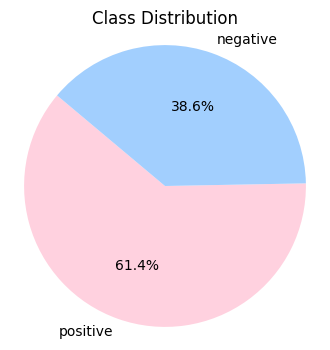

In [18]:
# Count values for the 'class' 
class_counts = df['class'].value_counts()

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ffd1df', '#a2cffe'])
plt.title('Class Distribution')
plt.axis('equal') 
plt.show()

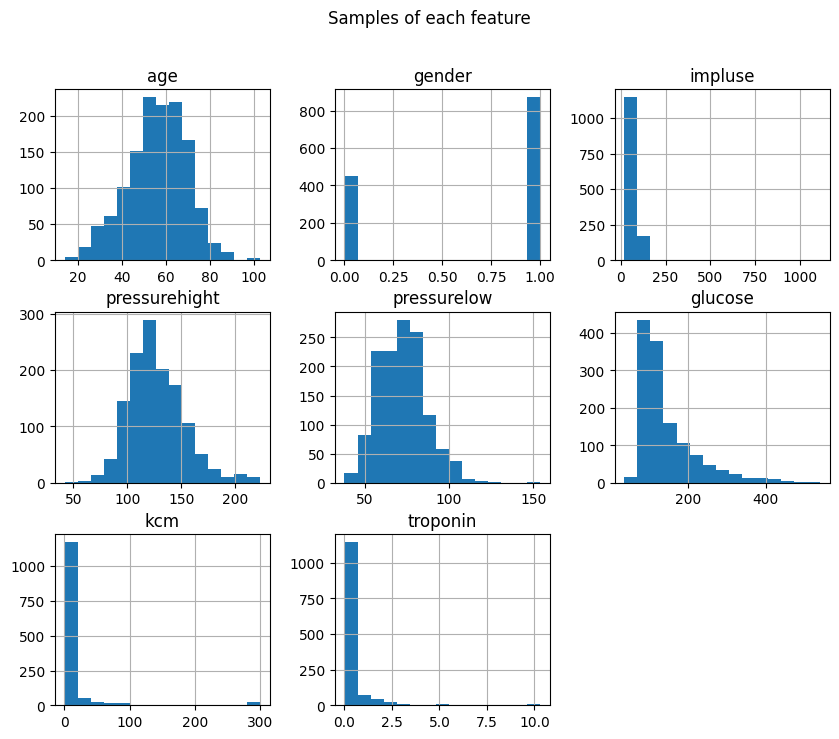

In [20]:
# Create DataFrame
df = pd.DataFrame(df)

# Histograms
df.hist(bins=15, figsize=(10, 8))
plt.suptitle('Samples of each feature')
plt.show()

### Dataset Training

In [21]:

# Map 'positive' to 1 and 'negative' to 0
df['class'] = df['class'].map({'positive': 1, 'negative': 0})

print(df)

      age  gender  impluse  pressurehight  pressurelow  glucose   kcm  \
0      64       1       66            160           83   160.00  1.80   
1      21       1       94             98           46   296.00  6.75   
2      55       1       64            160           77   270.00  1.99   
3      64       1       70            120           55   270.00 13.87   
4      55       1       64            112           65   300.00  1.08   
...   ...     ...      ...            ...          ...      ...   ...   
1314   44       1       94            122           67   204.00  1.63   
1315   66       1       84            125           55   149.00  1.33   
1316   45       1       85            168          104    96.00  1.24   
1317   54       1       58            117           68   443.00  5.80   
1318   51       1       94            157           79   134.00 50.89   

      troponin  class  
0         0.01      0  
1         1.06      1  
2         0.00      0  
3         0.12      1  
4  

In [22]:
X = df.drop(['class', 'troponin'], axis=1)
y = df['class']

X.shape, y.shape

((1319, 7), (1319,))

In [23]:
df['class'].value_counts()

class
1    810
0    509
Name: count, dtype: int64

### Split the dataset

In [24]:
# split the dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape

((1055, 7), (1055,), (264, 7), (264,))

### Intialize the Random Forest and hyperparameters

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.64      0.56      0.60       101
           1       0.75      0.80      0.78       163

    accuracy                           0.71       264
   macro avg       0.69      0.68      0.69       264
weighted avg       0.71      0.71      0.71       264



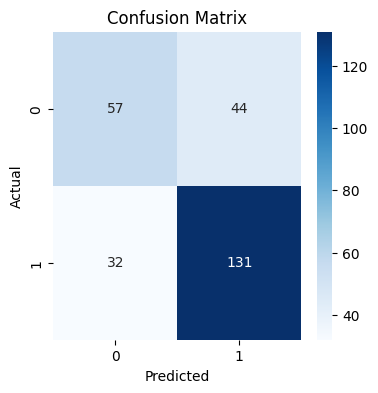

Accuracy: 0.71


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Initialize and fit the RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Initialize GridSearchCV with the RandomForestClassifier
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")





### Intializing Logistic regression

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       101
           1       0.75      0.80      0.78       163

    accuracy                           0.71       264
   macro avg       0.69      0.68      0.69       264
weighted avg       0.71      0.71      0.71       264



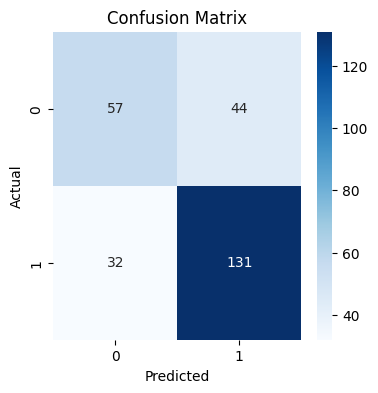

Accuracy: 0.71


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Initialize and fit the RandomForestClassifier
Log_Regression = LogisticRegression(random_state=42),

# Evaluate the model
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")




In [42]:
# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
   
}

In [47]:
from sklearn.metrics import f1_score, confusion_matrix
# Train and evaluate classifiers

results = {}
for name, clf in classifiers.items():
    
    clf.fit(X_train_scaled, y_train)
    
    train_predictions = clf.predict(X_train_scaled)
    test_predictions = clf.predict(X_test_scaled)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    f1_train = f1_score(y_train, train_predictions)
    f1_test = f1_score(y_test, test_predictions)
    cm_train = confusion_matrix(y_train, train_predictions)
    cm_test = confusion_matrix(y_test, test_predictions)
    
    results[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train F1 Score': f1_train,
        'Test F1 Score': f1_test,
        'Train Confusion Matrix': cm_train,
        'Test Confusion Matrix': cm_test,
        'Name': name,
        'Model': clf
    }


In [59]:
# Print results for classifiers
print("Results for Classifiers:")
print()

for name, metrics in results.items():
    print(f"Classifier: {name}")
    print(f"Train Accuracy: {metrics['Train Accuracy']:.2f}")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.2f}")
    
    print("\n")

Results for Classifiers:

Classifier: Random Forest
Train Accuracy: 1.00
Test Accuracy: 0.71


Classifier: Logistic Regression
Train Accuracy: 0.72
Test Accuracy: 0.73




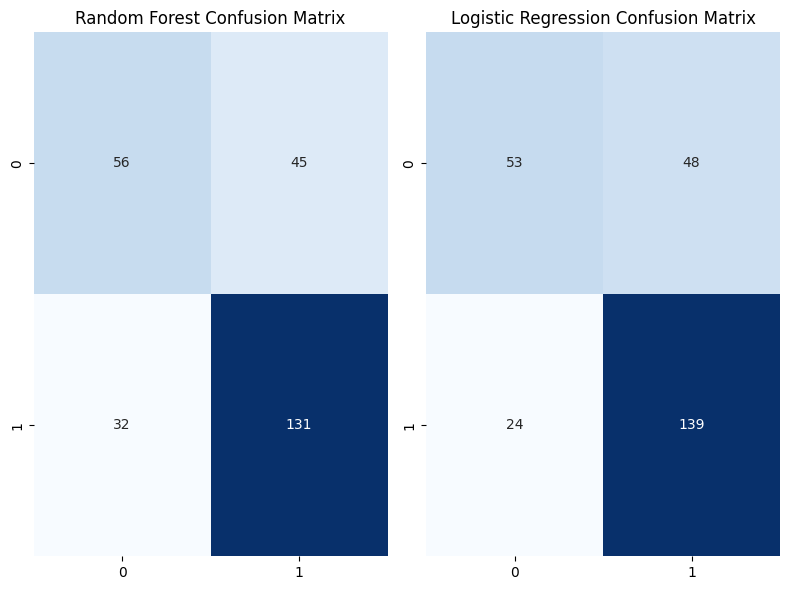

In [52]:
import math
num_models = len(results)
num_cols = min(num_models, 3)
num_rows = math.ceil(num_models / num_cols)

# Plot Confusion Matrix for base classifiers
plt.figure(figsize=(8,6))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(num_rows, num_cols, i+1)
    sns.heatmap(metrics['Test Confusion Matrix'], annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f'{name} Confusion Matrix')
plt.tight_layout()
plt.show()